# Final Project VIX ID/X - Predicting Credit Risk Score by Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Dataset

In [2]:
df = pd.read_csv ('/content/drive/MyDrive/Rakamin Mini Project/Rakamin VIX ID X/loan_data_2007_2014.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.000000,466285,"[0, 1, 2, 3, 4]"
1,id,int64,0,0.000000,466285,"[1077501, 1077430, 1077175, 1076863, 1075358]"
2,member_id,int64,0,0.000000,466285,"[1296599, 1314167, 1313524, 1277178, 1311748]"
3,loan_amnt,int64,0,0.000000,1352,"[5000, 2500, 2400, 10000, 3000]"
4,funded_amnt,int64,0,0.000000,1354,"[5000, 2500, 2400, 10000, 3000]"
...,...,...,...,...,...,...
70,all_util,float64,466285,100.000000,0,[nan]
71,total_rev_hi_lim,float64,70276,15.071469,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0]"
72,inq_fi,float64,466285,100.000000,0,[nan]
73,total_cu_tl,float64,466285,100.000000,0,[nan]


In [5]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

## Dropping Value part 1

**Some features consider to drop :**
- had 100% null value:
`annual_inc_joint`,`dti_joint`,`verification_status_joint`,`open_acc_6m`,
`open_il_6m`,`open_il_12m`,`open_il_24m`,`mths_since_rcnt_il`,`total_bal_il`,`il_util`,`open_rv_12m`,`open_rv_24m`,`max_bal_bc`,`all_util`,`inq_fi`,`total_cu_tl`,`inq_last_12m`
- represent full of unique value (high cardinality) : `Unnamed: 0`,`member_id`,`id`
- unnecessary feature : `url`,`desc`,`zip_code`,`pymnt_plan`
- only had 1 unique value : `policy_code`,`application_type`
- redundant feature qith feature `grade`: `sub_grade`

In [6]:
df1=df.copy()

In [7]:
df1=df1.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',
                    'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
                    'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'])
#had 100% null value

In [8]:
df1=df1.drop(columns=['Unnamed: 0','member_id','id','url','desc','zip_code','application_type','policy_code','sub_grade','pymnt_plan'])
#full unique value, unnecessary feature, only 1 value, redundant feature

In [9]:
nums=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths',
      'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
      'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
      'last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq','tot_coll_amt',
      'tot_cur_bal','total_rev_hi_lim']
cats=['term','grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status',
      'purpose','title','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d',
      'next_pymnt_d','last_credit_pull_d']


In [10]:
df1[cats].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
purpose,466285,14,debt_consolidation,274195
title,466265,63099,Debt consolidation,164075


In [11]:
df1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.000000,31.000000,49.00000,1.880000e+02


## Checking Null Value

In [12]:
total_null = df1.isnull().sum() # mencari null value masing-masing kolom
percent_missing = df1.isnull().sum() * 100/ len(df) # dicari persentase nya
dtypes = [df1[col].dtype for col in df1.columns] # buat kolom dtype = tipe data

df_missing_value = pd.DataFrame({'total_null': total_null, # buat judulnya dan diisi dari 3 varibel diatas
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values(['data_type','percent_missing'], ascending = False,inplace = True) # sorting berdasarkan tipe data dan persentase missing
missing_value = df_missing_value[(df_missing_value['percent_missing']>0)].reset_index() #filter yang percentnya diatas 0)
missing_value

,index,total_null,data_type,percent_missing
0,next_pymnt_d,227214,object,48.728567
1,emp_title,27588,object,5.916553
2,emp_length,21008,object,4.505399
3,last_pymnt_d,376,object,0.080637
4,last_credit_pull_d,42,object,0.009007
5,earliest_cr_line,29,object,0.006219
6,title,20,object,0.004289
7,mths_since_last_record,403647,float64,86.566585
8,mths_since_last_major_derog,367311,float64,78.773926
9,mths_since_last_delinq,250351,float64,53.690554


## Dropping Feature part 2 
dropping feature for **percentage missing value > 20% :**
`next_pymnt_d`, `mths_since_last_record`, `mths_since_last_major_derog`, `mths_since_last_delinq`

In [13]:
df1=df1.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq'])
#missing value > 20%

## Cek Duplikat

In [14]:
df.duplicated().sum()

0

# Date Time - Feature Engineering (I)

Source : https://www.kaggle.com/code/anshulrao/loan-default-analysis-and-prediction-python

**A charge-off** usually occurs when the creditor has deemed an outstanding debt is uncollectible; this typically follows 180 days or six months of non-payment. In addition, debt payments that fall below the required minimum payment for the period will also be charged off if the debtor does not make up for the shortfall. The creditor crosses off the consumer’s debt as uncollectible and marks it on the consumer’s credit report as a charge-off. [Source](https://www.investopedia.com/terms/c/chargeoff.asp)

**A default** on debt happens when a borrower fails to repay the funds according to the initial agreement. With most consumer loans, this typically involves missing multiple payments for several weeks or months in a row.

Fortunately, lenders usually allow a grace period before penalizing the borrower after missing one payment. The period between missing a loan payment and having the loan default is known as "delinquency." The delinquency period helps you avoid default by giving you extra time to contact your loan servicer and catch up on missed payments. [Source](https://www.valuepenguin.com/loans/what-does-it-mean-to-default-on-a-loan)

## Ekstrak Fitur Durasi Pinjaman

In [15]:
import time
from datetime import date
from datetime import timedelta
df1['year'] = pd.to_datetime(df1['issue_d'], format="%b-%y") #dari issue_d = tahun mulai credit
df1['year_last_payment'] = pd.to_datetime(df1['last_pymnt_d'], format="%b-%y") #dari last_pymnt_d = bulan pembayaran terakhir
df1['duration_loan'] = round(pd.to_numeric((df1['year_last_payment']-df1['year'])/np.timedelta64(1,'M'))) # Dalam bulan, berapa lama sudah creditnya.

In [16]:
df1.duration_loan.value_counts()

15.0    31867
14.0    30421
18.0    23646
17.0    22385
36.0    21448
        ...  
65.0        2
64.0        1
63.0        1
69.0        1
70.0        1
Name: duration_loan, Length: 69, dtype: int64

## Ekstrak Tahun dalam year

In [17]:
df1['tahun_pinjaman']=df1['year'].dt.strftime("%Y").astype(int)

In [18]:
df1.tahun_pinjaman.value_counts()

2014    235628
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: tahun_pinjaman, dtype: int64

## Dropping Feature part 3
because unnecessary feature (date): `earliest_cr_line`, `last_credit_pull_d`, We only use `issue_d`, `last_payment` for duration_loan

In [19]:
df1=df1.drop(columns=['earliest_cr_line','last_credit_pull_d'])
#unnecessary date time feature 

# Data Visualization - Analisis Univariate

### Purpose

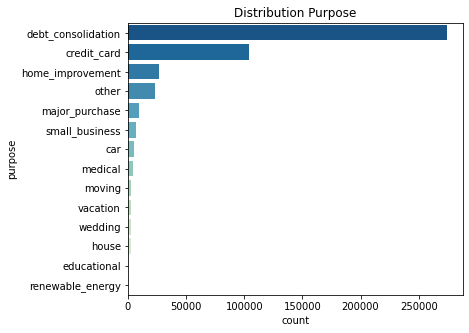

In [20]:
plt.figure(figsize=(6,5))
ax = sns.countplot(y="purpose", data=df1, palette="GnBu_r", 
                   order=df1['purpose'].value_counts().index, 
                   dodge=False
                   )
ax.set(title="Distribution Purpose");

### Country

In [21]:
import plotly.graph_objects as go


In [22]:
# Getting frequency of loans given to every state.
statewise_loan_freq = df1.groupby(['addr_state'], as_index=False).size()

In [23]:
fig = go.Figure(
    data=go.Choropleth(
        locations=list(statewise_loan_freq['addr_state'].values),
        z = list(statewise_loan_freq['size'].values),
        locationmode = 'USA-states',
        colorscale = 'Blues'
))

fig.update_layout(
    title_text = 'Loans Offered by State',
    geo_scope='usa',
)

fig.show()

### Term

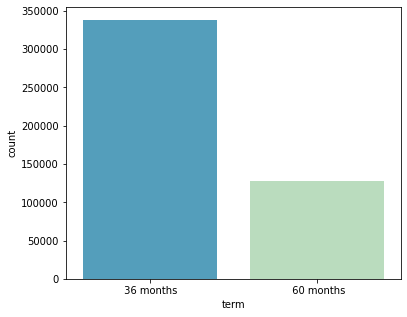

In [24]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='term', data=df1, palette="GnBu_r")

In [25]:
df1.term.describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

### Loan status

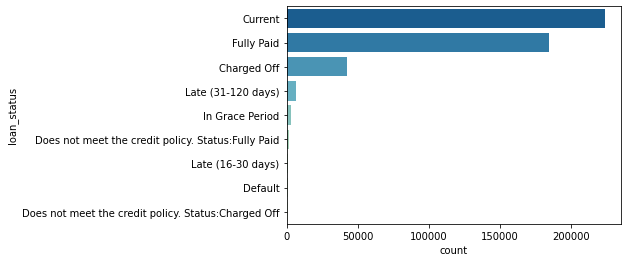

In [26]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='loan_status', order=df1['loan_status'].value_counts().index,palette="GnBu_r",  
                   dodge=False, data=df1)

In [27]:
df1_purpose = df1.groupby('loan_status').agg({'purpose':'count'}).sort_values('purpose',ascending = False)
df1_purpose=df1_purpose.rename(columns ={'purpose':'total'}).reset_index()
df1_purpose['%'] = round(df1_purpose['total']*100/sum(df1_purpose['total']),2)
df1_purpose

,loan_status,total,%
0,Current,224226,48.09
1,Fully Paid,184739,39.62
2,Charged Off,42475,9.11
3,Late (31-120 days),6900,1.48
4,In Grace Period,3146,0.67
5,Does not meet the credit policy. Status:Fully ...,1988,0.43
6,Late (16-30 days),1218,0.26
7,Default,832,0.18
8,Does not meet the credit policy. Status:Charge...,761,0.16


In [28]:
df1.loan_status.describe()

count      466285
unique          9
top       Current
freq       224226
Name: loan_status, dtype: object

### Home Ownership

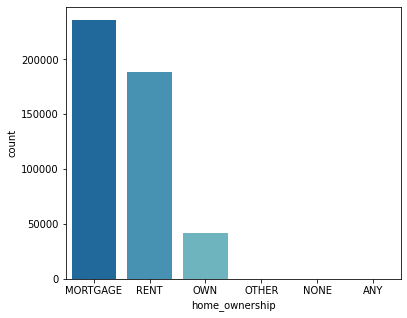

In [29]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='home_ownership', order=df1['home_ownership'].value_counts().index, palette="GnBu_r",  data=df1)

### Lama Bekerja

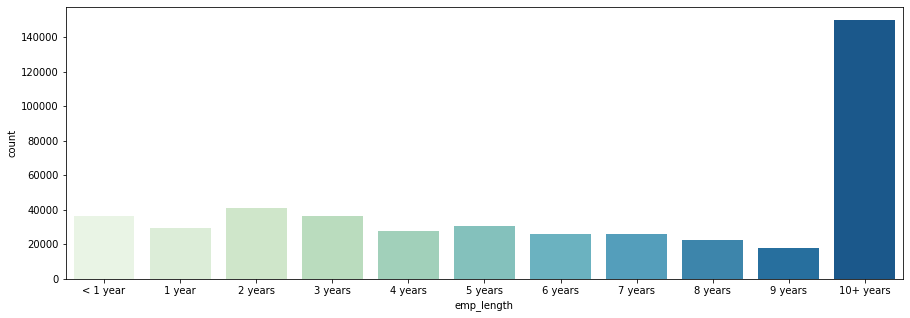

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="emp_length", order =['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years',
                                                      '9 years','10+ years'], palette='GnBu', data=df1)

In [31]:
df1.home_ownership.describe()

count       466285
unique           6
top       MORTGAGE
freq        235875
Name: home_ownership, dtype: object

### Title

In [32]:
df1.emp_title.describe()

count      438697
unique     205475
top       Teacher
freq         5399
Name: emp_title, dtype: object

### Debt to Income (DTI)

**The debt-to-income (DTI)** ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.

As a general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified for a mortgage. Ideally, lenders prefer a debt-to-income ratio lower than 36%, with no more than 28% of that debt going towards servicing a mortgage or rent payment. [Source](https://www.investopedia.com/terms/d/dti.asp)

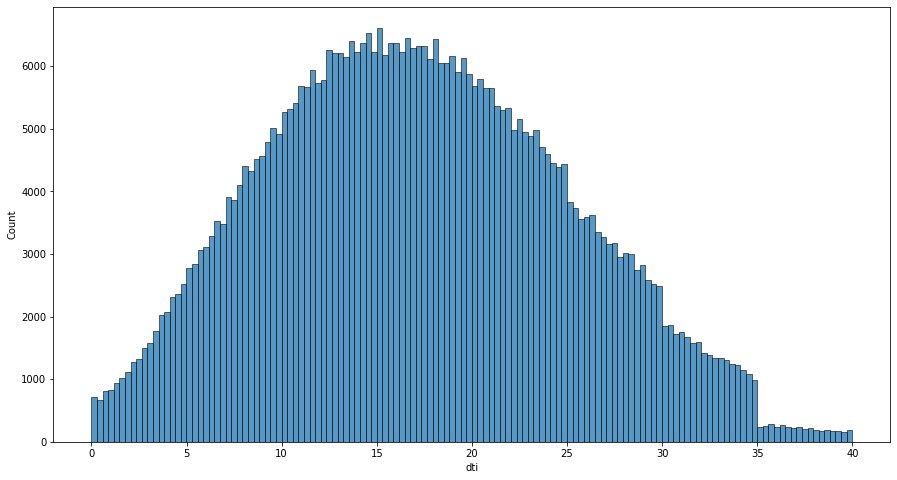

In [33]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", data=df1)

In [34]:
df1.dti.describe()

count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64

### Annual Income

In [35]:
df1.annual_inc.describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

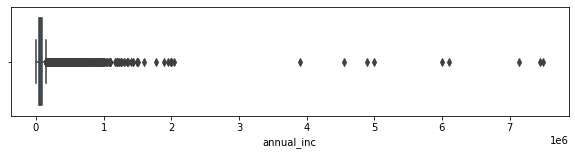

In [36]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x="annual_inc", data=df1) # dalam bulan

### Durasi Pinjaman

In [37]:
df1.duration_loan.describe()

count    465909.000000
mean         19.955517
std           9.543077
min           0.000000
25%          14.000000
50%          18.000000
75%          26.000000
max          70.000000
Name: duration_loan, dtype: float64

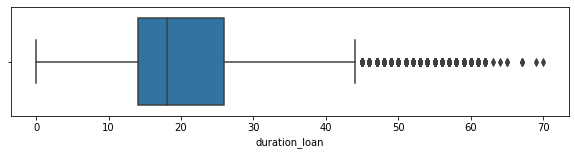

In [38]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x="duration_loan", data=df1) # dalam bulan

### Biaya Angsuran / Installment

In [39]:
df1['installment'].describe()

count    466285.000000
mean        432.061201
std         243.485550
min          15.670000
25%         256.690000
50%         379.890000
75%         566.580000
max        1409.990000
Name: installment, dtype: float64

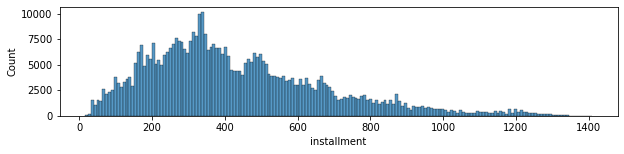

In [40]:
plt.figure(figsize=(10, 2))
ax = sns.histplot(x="installment", data=df1)

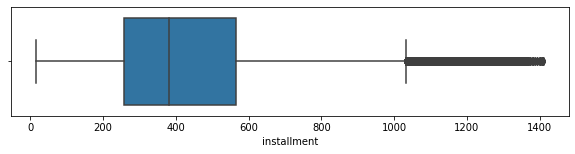

In [41]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x="installment", data=df1) # dalam bulan

### Jumlah Pinjaman

In [42]:
df1['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

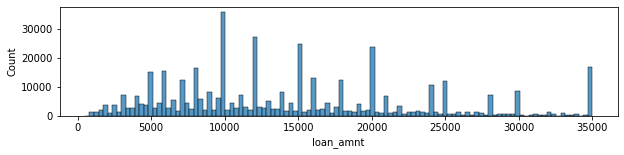

In [43]:
plt.figure(figsize=(10, 2))
ax = sns.histplot(x="loan_amnt", data=df1)

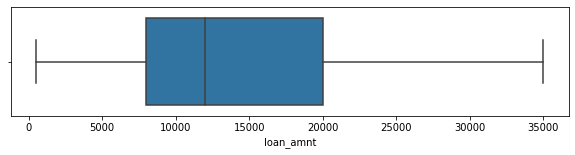

In [44]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x="loan_amnt", data=df1)

### 9. Interest Rate

In [45]:
df1['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

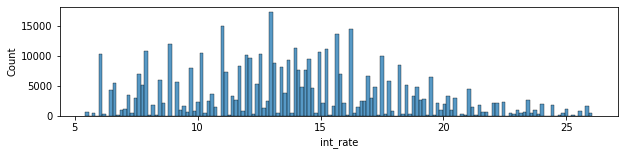

In [46]:
plt.figure(figsize=(10, 2))
ax = sns.histplot(x="int_rate", data=df1)

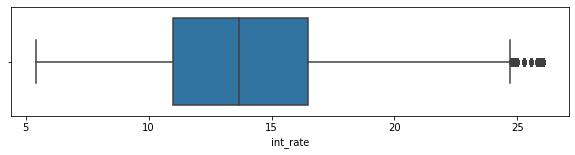

In [47]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x="int_rate", data=df1)

# Feature Engineering (II)

Feature Engineering :
- `loan_status` -> Risk
Good = Current, Fully Paid, In Grace Periode
Bad = beside Good



## Risk 

In [48]:
df1.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [49]:
df1['risk']=np.where((df1['loan_status']=='Charged Off') |
                     (df1['loan_status']=='Late (31-120 days)') |
                     (df1['loan_status']=='Late (16-30 days)') |
                     (df1['loan_status']=='Default') |
                     (df1['loan_status']=='Does not meet the credit policy. Status:Charged Off'), 'Bad Risk','Good Risk')

- Make a binary clasification : Bad Risk = 1, Good Risk = 0 
- Feature `risk1` will be a target feature

In [50]:
df1['risk1'] = np.where(df1['risk']=='Bad Risk',1,0)
df1['risk1'].value_counts()/len(df1)*100

0    88.808132
1    11.191868
Name: risk1, dtype: float64

## Home_ownership

In [51]:
df1.home_ownership.value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [52]:
df1.home_ownership.replace('NONE','OTHER',inplace=True)
df1.home_ownership.replace('ANY','OTHER',inplace=True)

# Data Visualization - Analisis Multivariate

## Purpose vs Risk

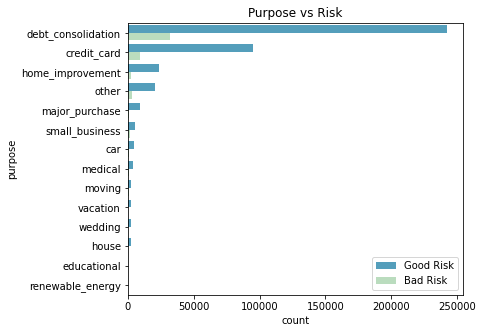

In [53]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(y="purpose",hue='risk',palette='GnBu_r',order=df1['purpose'].value_counts().index, data=df1)
plt.legend(loc=4)
ax.set(title="Purpose vs Risk");

## Term vs Risk

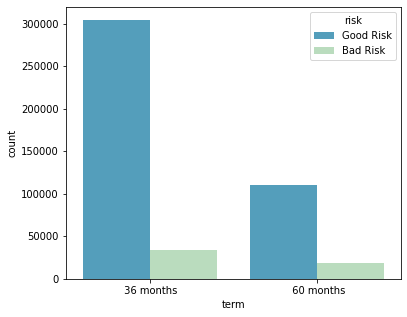

In [54]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="term",hue='risk',palette='GnBu_r', data=df1)

## Home owner_ship vs Risk

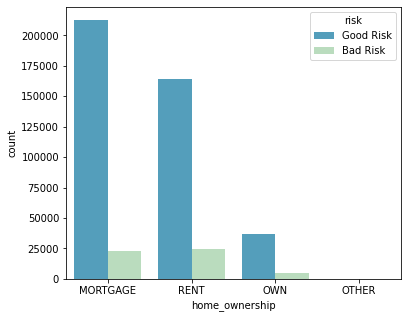

In [55]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="home_ownership",hue='risk',palette='GnBu_r',order=df1['home_ownership'].value_counts().index, data=df1)

## Lama bekerja vs Risk

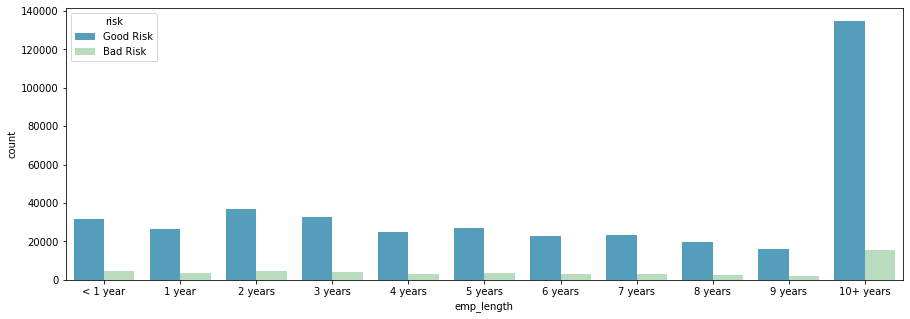

In [56]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="emp_length",hue='risk', order =['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years',
                                                      '9 years','10+ years'], palette='GnBu_r', data=df1)


## Jumlah Loan vs Year

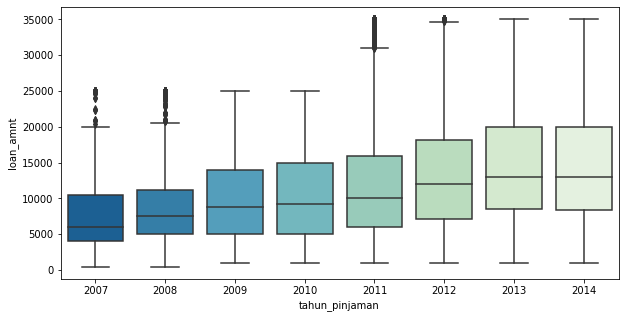

In [57]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="tahun_pinjaman",y='loan_amnt',palette='GnBu_r', data=df1)

## Jumlah Loan vs Jumlah peminjam vs year

In [58]:
df1_loan = df1.groupby('tahun_pinjaman').agg({'loan_amnt':'sum'}).sort_values('tahun_pinjaman',ascending = True)
df1_loan=df1_loan.rename(columns ={'loan_amnt':'total_loan'}).reset_index()
df1_loan

,tahun_pinjaman,total_loan
0,2007,4977475
1,2008,21119250
2,2009,51928250
3,2010,131992550
4,2011,261683825
5,2012,718411025
6,2013,1981989225
7,2014,3503830175


In [59]:
df1_loan1 = df1.groupby('tahun_pinjaman').agg({'loan_amnt':'count'}).sort_values('tahun_pinjaman',ascending = True)
df1_loan1=df1_loan1.rename(columns ={'loan_amnt':'total_peminjam'}).reset_index()
df1_loan1

,tahun_pinjaman,total_peminjam
0,2007,603
1,2008,2393
2,2009,5281
3,2010,12537
4,2011,21721
5,2012,53367
6,2013,134755
7,2014,235628


In [60]:
df1_loan2 = df1_loan.merge(df1_loan1,left_on=['tahun_pinjaman'],right_on=['tahun_pinjaman'], how ='left')
df1_loan2

,tahun_pinjaman,total_loan,total_peminjam
0,2007,4977475,603
1,2008,21119250,2393
2,2009,51928250,5281
3,2010,131992550,12537
4,2011,261683825,21721
5,2012,718411025,53367
6,2013,1981989225,134755
7,2014,3503830175,235628


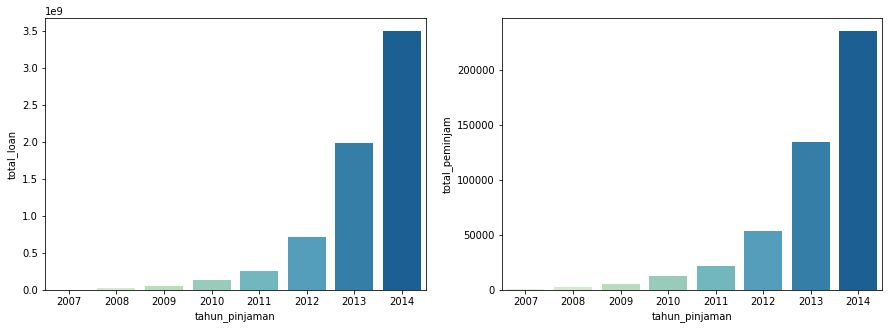

In [61]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(15, 5))
sns.barplot(x="tahun_pinjaman", y="total_loan", data=df1_loan2,  orient='v' ,palette='GnBu', ax=axes[0])
sns.barplot(x="tahun_pinjaman", y="total_peminjam", data=df1_loan2,  orient='v' ,palette='GnBu', ax=axes[1]);

## Jumlah Loan vs Risk vs Year

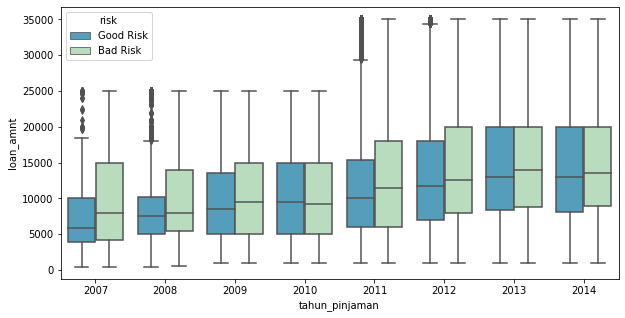

In [62]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="tahun_pinjaman",y='loan_amnt', hue= 'risk', palette='GnBu_r', data=df1)

## Jumlah Loan vs Grade vs Risk

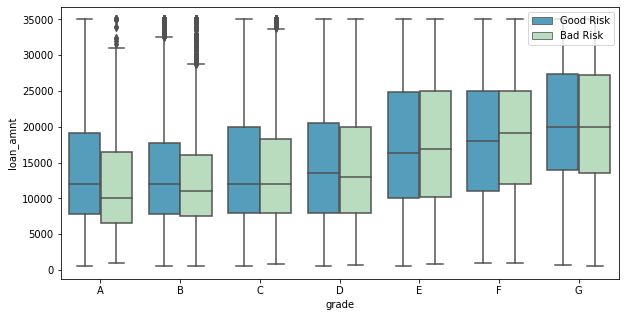

In [63]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="grade",y='loan_amnt', hue= 'risk', order =['A','B','C','D','E','F','G'],palette='GnBu_r', data=df1)
plt.legend(loc=1);

## Jumlah Loan vs Loan_status

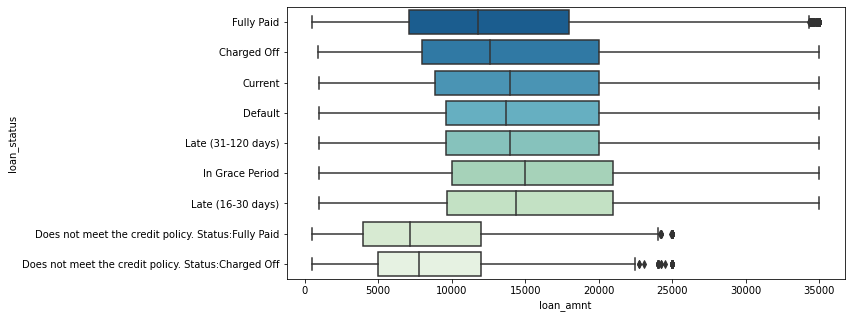

In [64]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="loan_status",x='loan_amnt',palette='GnBu_r', data=df1)

## Jumlah Loan vs Int Rate

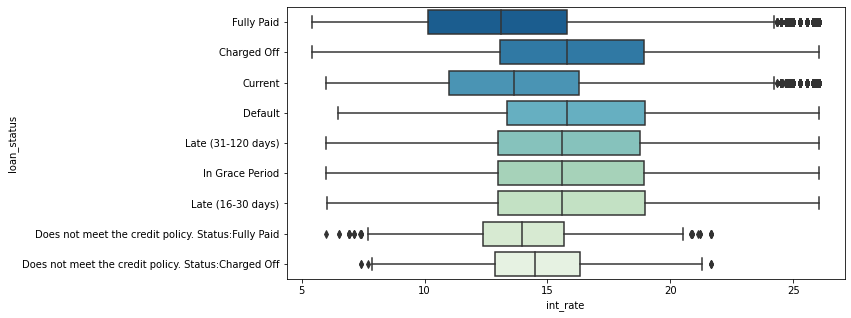

In [65]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="loan_status",x='int_rate',palette='GnBu_r', data=df1)

## DTI vs year

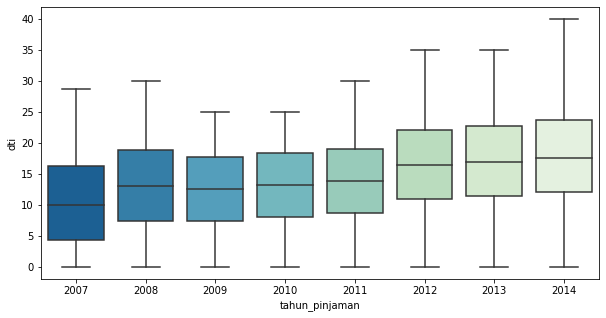

In [66]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="tahun_pinjaman",y='dti',palette='GnBu_r', data=df1)

## DTI vs risk vs year

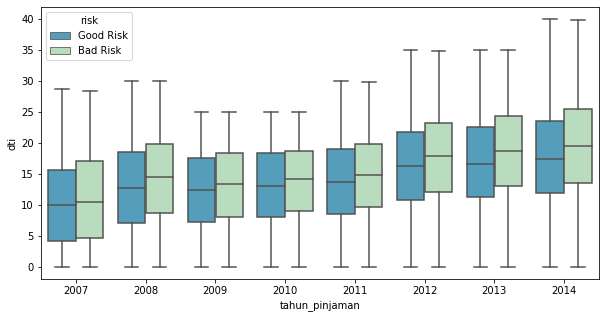

In [67]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="tahun_pinjaman",y='dti', hue= 'risk', palette='GnBu_r', data=df1)

## DTI vs risk vs grade

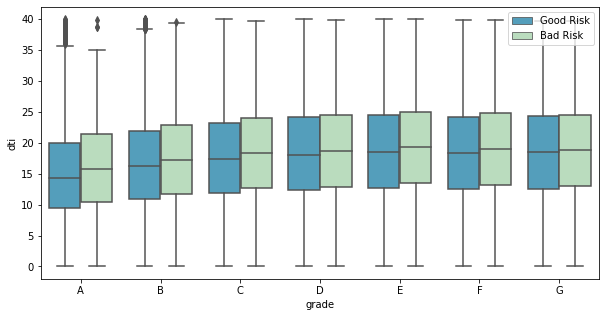

In [68]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="grade",y='dti', hue= 'risk', order =['A','B','C','D','E','F','G'],palette='GnBu_r', data=df1)
plt.legend(loc=1);

## Int Rate vs Year

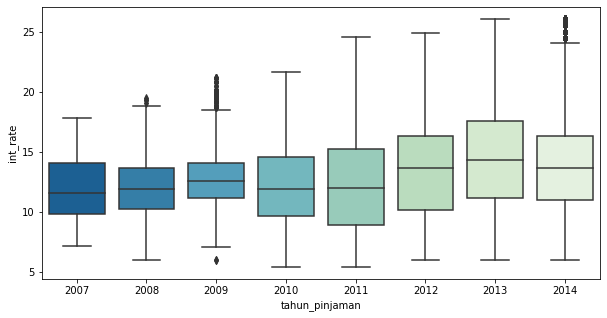

In [69]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="tahun_pinjaman",y='int_rate',palette='GnBu_r', data=df1)

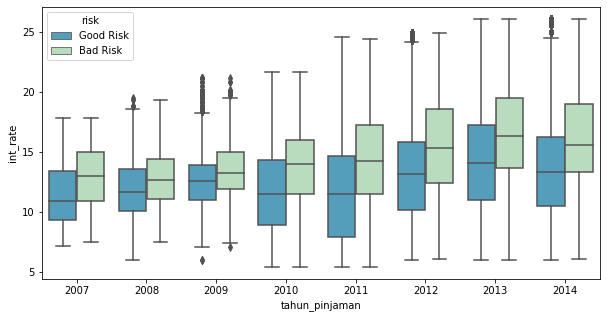

In [70]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="tahun_pinjaman",y='int_rate',hue ='risk',palette='GnBu_r', data=df1)

## Duration Loan vs Risk

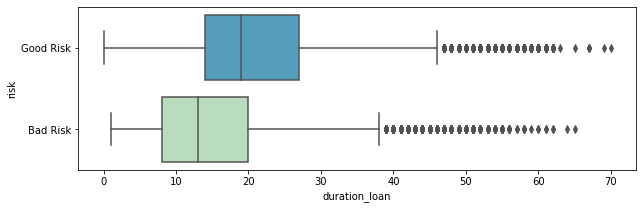

In [71]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x='duration_loan',y='risk',palette='GnBu_r', data=df1)

## Heatmap

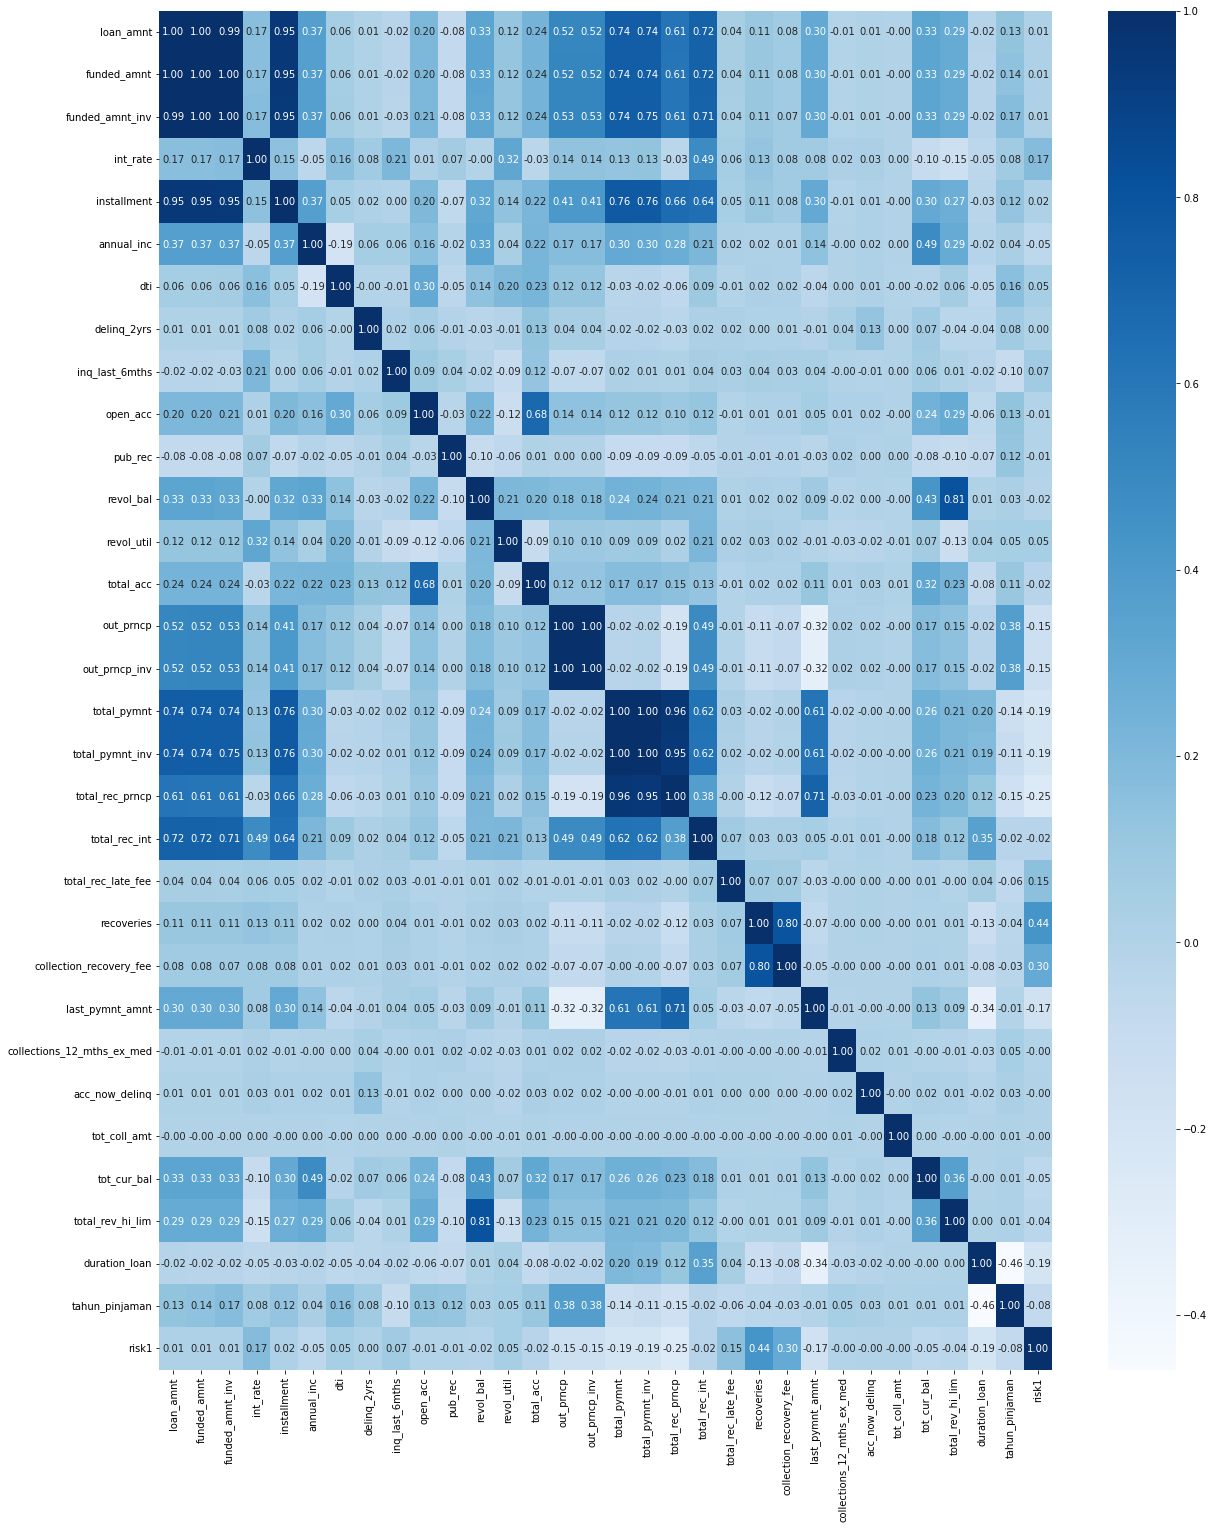

In [72]:
plt.figure(figsize=(20, 25))
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

https://medium.com/@achmad.rozie/ml-create-customer-churn-prediction-using-3-method-comparison-support-vector-machine-naive-c44d6a6f871a

## Dropping Feature part 4

To prevent multicolinearity : some feature should be omitted.

In [73]:
df1=df1.drop(columns=['loan_amnt','funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv',
                      'total_rec_int','out_prncp_inv'])

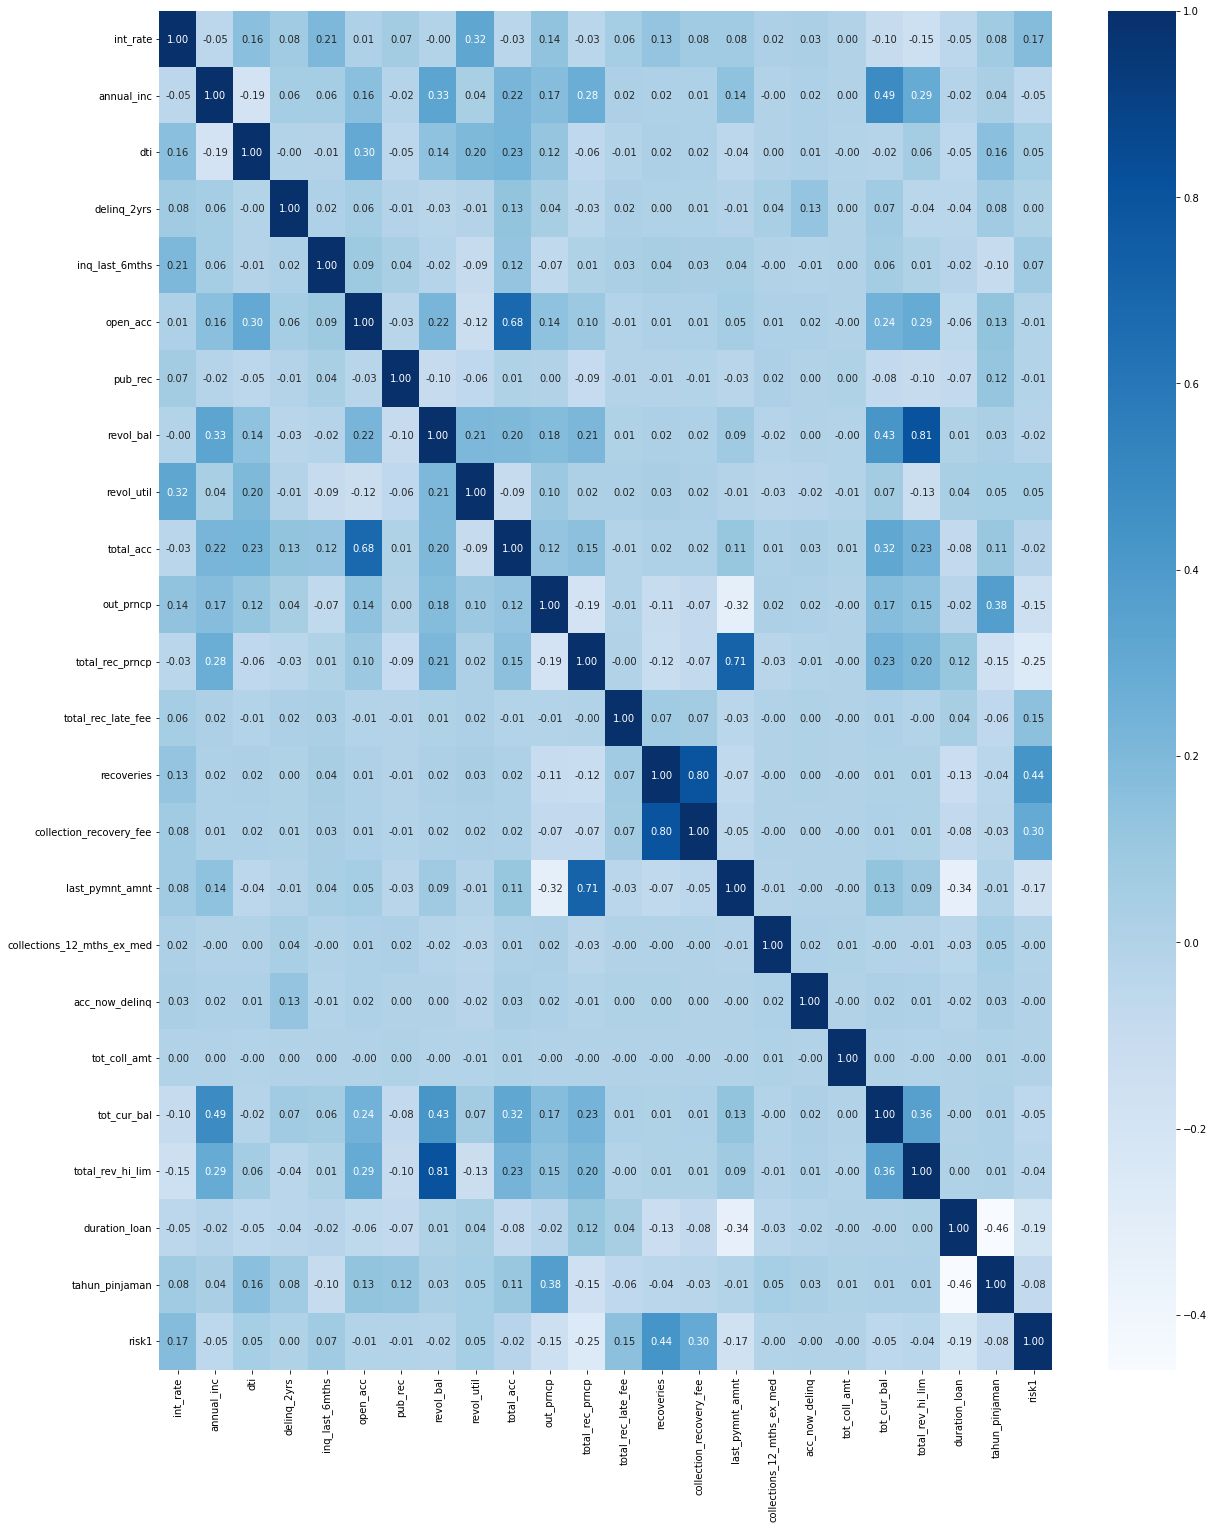

In [74]:
plt.figure(figsize=(20, 25))
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

# Data preprocessing Part II

## Handling Null Value

In [75]:
total_null = df1.isnull().sum() # mencari null value masing-masing kolom
percent_missing = df1.isnull().sum() * 100/ len(df) # dicari persentase nya
dtypes = [df1[col].dtype for col in df1.columns] # buat kolom dtype = tipe data

df_missing_value = pd.DataFrame({'total_null': total_null, # buat judulnya dan diisi dari 3 varibel diatas
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values(['data_type','percent_missing'], ascending = False,inplace = True) # sorting berdasarkan tipe data dan persentase missing
missing_value = df_missing_value[(df_missing_value['percent_missing']>0)].reset_index() #filter yang percentnya diatas 0)
missing_value

,index,total_null,data_type,percent_missing
0,emp_title,27588,object,5.916553
1,emp_length,21008,object,4.505399
2,last_pymnt_d,376,object,0.080637
3,title,20,object,0.004289
4,year_last_payment,376,datetime64[ns],0.080637
5,tot_coll_amt,70276,float64,15.071469
6,tot_cur_bal,70276,float64,15.071469
7,total_rev_hi_lim,70276,float64,15.071469
8,duration_loan,376,float64,0.080637
9,revol_util,340,float64,0.072917


Handling Null Value :
- Dropping value because high cardinality: `emp_title`
- Unnecessary feature : `last_pymnt_d`, and `year_last_payment`
- Duplication feature : `year`, and `issue_d`, already used for `duration_loan`, `risk` only for data visualization, `risk1` for modelling
- Imputation : `title` with mode
- Numeric value : Imputation with median value
- Imputation with 0 : `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim`, replace missing value with "0" because asumption that customer didn't borrowed

### Dropping feature part 5

In [76]:
df1=df1.drop(columns=['emp_title','last_pymnt_d','year_last_payment'])

In [77]:
df1=df1.drop(columns=['year','issue_d','risk'])

In [78]:
for col in ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']:
    df1[col] = df1[col].fillna(0)

In [79]:
for col in df1.select_dtypes(exclude = 'object'):
    df1[col] = df1[col].fillna(df1[col].median())
df1.isnull().sum()

term                              0
int_rate                          0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
purpose                           0
title                            20
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
total_rec_prncp                   0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med        0
acc_now_delinq              

In [80]:
for col in df1.select_dtypes(include = 'object'):
    df1[col] = df1[col].fillna(df1[col].mode().iloc[0])
df1.isnull().sum()

term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_prncp               0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
duration

## Extract Data Term
- `term` -> numerical 36 and 60

In [81]:
df1['term'] = df1['term'].apply(lambda term: int(term[:3]))

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   grade                       466285 non-null  object 
 3   emp_length                  466285 non-null  object 
 4   home_ownership              466285 non-null  object 
 5   annual_inc                  466285 non-null  float64
 6   verification_status         466285 non-null  object 
 7   loan_status                 466285 non-null  object 
 8   purpose                     466285 non-null  object 
 9   title                       466285 non-null  object 
 10  addr_state                  466285 non-null  object 
 11  dti                         466285 non-null  float64
 12  delinq_2yrs                 466285 non-null  float64
 13  inq_last_6mths

## Handling Outlier

In [83]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))

for col in df1.select_dtypes(exclude = 'object'):
    zscore = abs(stats.zscore(df1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df1 = df1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 466285
Jumlah baris setelah memfilter outlier: 375010


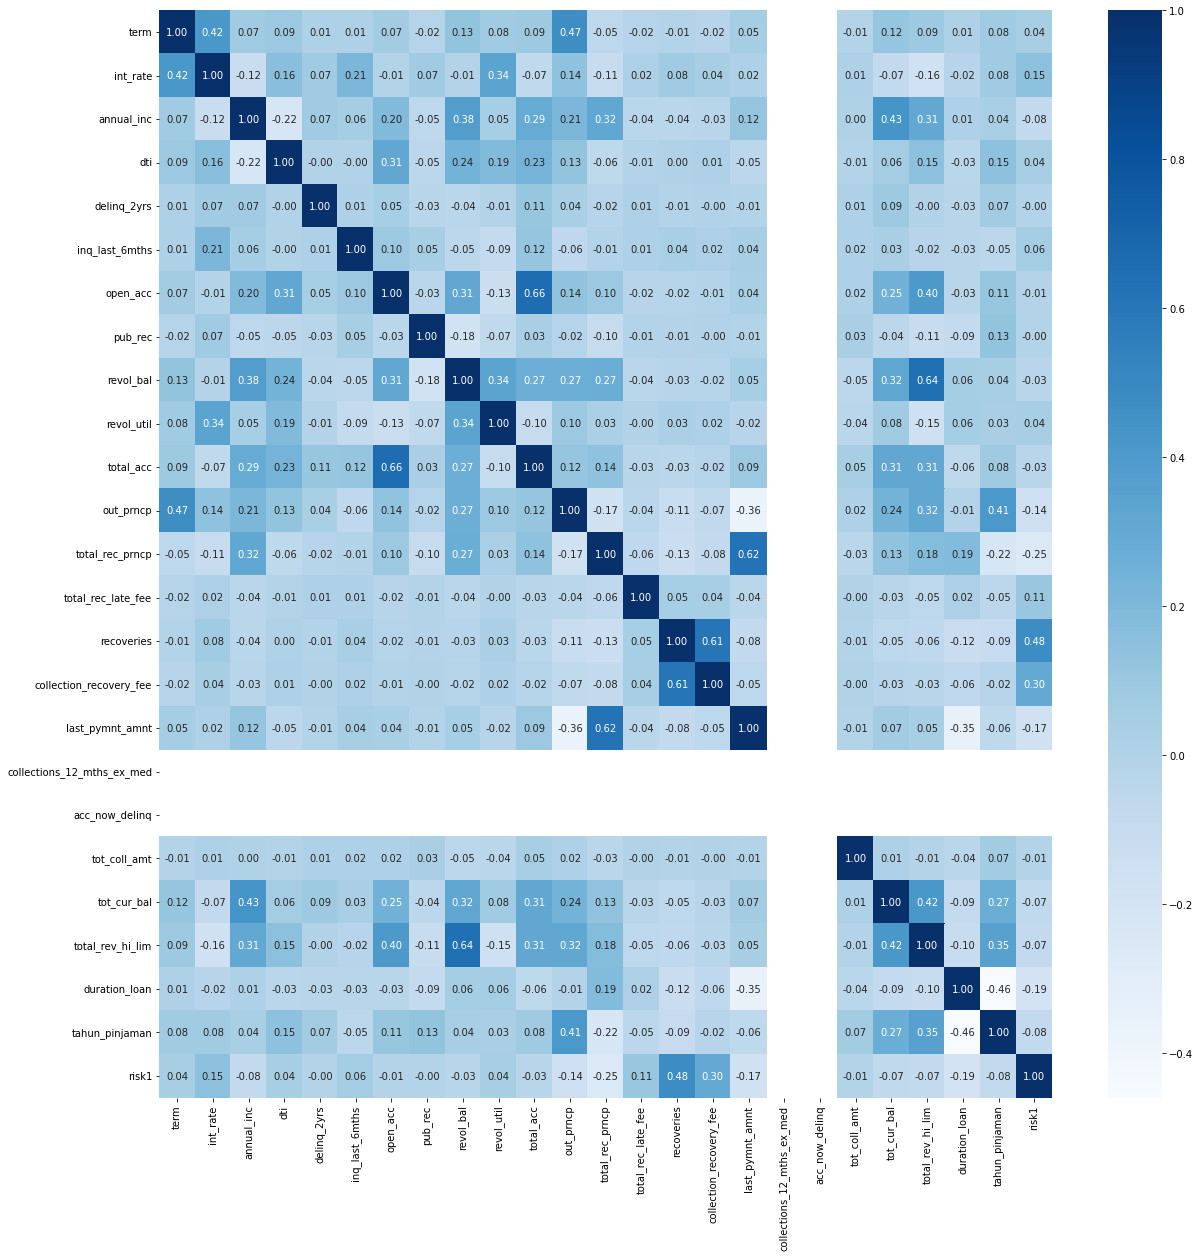

In [84]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

## Dropping feature part 6

Dropping value again for `collections_12_mths_ex_med`,`acc_now_delinq`, because only 1 unique value after handling outlier

In [85]:
df1=df1.drop(columns=['collections_12_mths_ex_med','acc_now_delinq'])

In [86]:
df1=df1.drop(columns=['title','addr_state','loan_status']) # high cardinality again, already use for only Data Visualization

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375010 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   term                     375010 non-null  int64  
 1   int_rate                 375010 non-null  float64
 2   grade                    375010 non-null  object 
 3   emp_length               375010 non-null  object 
 4   home_ownership           375010 non-null  object 
 5   annual_inc               375010 non-null  float64
 6   verification_status      375010 non-null  object 
 7   purpose                  375010 non-null  object 
 8   dti                      375010 non-null  float64
 9   delinq_2yrs              375010 non-null  float64
 10  inq_last_6mths           375010 non-null  float64
 11  open_acc                 375010 non-null  float64
 12  pub_rec                  375010 non-null  float64
 13  revol_bal                375010 non-null  int64  
 14  revo

# Feature Selection Using Weight of Evidence & Information Value

[Source](https://github.com/okyhariawan/VIX-IDX-Credit-Risk-Loan-Prediction/blob/main/ID_X_Partners_Credit_Risk_Loan_Prediction.ipynb)

In [88]:
df2= df1.copy()

In [89]:
# code automation

def woe(raw, feature_name):
    # probability analysis
    feature_name = raw.groupby(feature_name).agg(num_observation=('risk1','count'),
                                                good_loan_prob=('risk1','mean')).reset_index()
    
    # find the feature proportion
    feature_name['feat_proportion'] = feature_name['num_observation']/(feature_name['num_observation'].sum())
    
    # find number of approved loan behavior
    feature_name['num_loan_approve'] = feature_name['feat_proportion'] * feature_name['num_observation']

    # find number of declined loan behavior
    feature_name['num_loan_decline'] = (1-feature_name['feat_proportion']) * feature_name['num_observation']

    # find approved loan proportion
    feature_name['prop_loan_approve'] = feature_name['num_loan_approve'] / (feature_name['num_loan_approve'].sum())

    # find declined loan proportion
    feature_name['prop_loan_decline'] = feature_name['num_loan_decline'] / (feature_name['num_loan_decline'].sum())

    # calculate weight of evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['prop_loan_approve'] / feature_name['prop_loan_decline'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    
    # calculate information value
    feature_name['information_value'] = (feature_name['prop_loan_approve']-feature_name['prop_loan_decline']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    #Show
    feature_name = feature_name.drop(['feat_proportion','num_loan_approve','num_loan_decline','prop_loan_approve','prop_loan_decline'],axis = 1)

    return feature_name

## Data Categorik

In [90]:
# Categorical Statistic Value
df2.describe(include = 'O').T

,count,unique,top,freq
grade,375010,7,B,116788
emp_length,375010,11,10+ years,135584
home_ownership,375010,4,MORTGAGE,181103
verification_status,375010,3,Not Verified,129852
purpose,375010,14,debt_consolidation,220470
initial_list_status,375010,2,f,242872


In [91]:
woe(df2,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,1693,0.232132,-4.175847,0.302891
1,F,8370,0.202389,-2.559648,0.302891
2,E,24224,0.169460,-1.452753,0.302891
3,D,58068,0.138476,-0.477025,0.302891
4,A,65237,0.035854,-0.337734,0.302891
5,C,100630,0.104005,0.217015,0.302891
6,B,116788,0.071857,0.426620,0.302891


In [92]:
woe(df2,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,14410,0.093893,-1.659206,1.003918
1,8 years,18117,0.092510,-1.419944,1.003918
2,6 years,21326,0.099175,-1.247836,1.003918
3,7 years,21429,0.095571,-1.242726,1.003918
4,4 years,22814,0.093890,-1.176172,1.003918
5,1 year,23757,0.097992,-1.132988,1.003918
6,5 years,25270,0.099960,-1.066931,1.003918
7,< 1 year,29096,0.104722,-0.914948,1.003918
8,3 years,29740,0.096738,-0.891193,1.003918
9,2 years,33467,0.094989,-0.762273,1.003918


In [93]:
woe(df2,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,OTHER,78,0.166667,-8.169354,0.277792
1,OWN,33771,0.094489,-2.004544,0.277792
2,RENT,160058,0.110541,0.013558,0.277792
3,MORTGAGE,181103,0.080247,0.240124,0.277792


In [94]:
woe(df2,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Source Verified,121137,0.090476,-0.048026,0.001906
1,Verified,124021,0.108466,-0.013072,0.001906
2,Not Verified,129852,0.084850,0.056378,0.001906


In [95]:
woe(df2,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,educational,90,0.200000,-7.952103,1.374027
1,renewable_energy,278,0.122302,-6.823790,1.374027
2,house,1609,0.113114,-5.064485,1.374027
3,wedding,1827,0.103448,-4.936838,1.374027
4,vacation,2163,0.119279,-4.767117,1.374027
5,moving,2465,0.143205,-4.635611,1.374027
6,medical,3723,0.125974,-4.219890,1.374027
7,car,4395,0.082821,-4.052141,1.374027
8,small_business,4635,0.188781,-3.998324,1.374027
9,major_purchase,7841,0.084428,-3.463900,1.374027


In [96]:
woe(df2,'initial_list_status')

,initial_list_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,w,132138,0.080045,-0.783516,0.330641
1,f,242872,0.102330,0.433860,0.330641


In [97]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
term,375010.0,41.782950,10.263945,36.00,36.0000,36.000,36.0000,60.0000
int_rate,375010.0,13.532386,4.269715,5.42,10.4900,13.350,16.2900,26.0600
annual_inc,375010.0,66198.989756,32515.658586,3000.00,43000.0000,60000.000,81000.0000,238000.0000
dti,375010.0,17.328783,7.837268,0.00,11.4700,16.980,22.9000,39.9900
delinq_2yrs,375010.0,0.186998,0.468725,0.00,0.0000,0.000,0.0000,2.0000
inq_last_6mths,375010.0,0.727826,0.951344,0.00,0.0000,0.000,1.0000,4.0000
open_acc,375010.0,10.790806,4.478590,0.00,8.0000,10.000,13.0000,26.0000
pub_rec,375010.0,0.123575,0.329097,0.00,0.0000,0.000,0.0000,1.0000
revol_bal,375010.0,14058.491227,10951.310763,0.00,6310.0000,11247.000,18762.0000,78213.0000
revol_util,375010.0,56.382270,23.395438,0.00,39.7000,57.700,74.6000,125.8000


## Data Numerik

In [98]:
woe(df2,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60,90361,0.116820,-1.697753,0.937353
1,36,284649,0.087385,0.597135,0.937353


In [99]:
#refining class = 10 class
df2['int_rate_woe'] = pd.cut(df2['int_rate'], 10)
woe(df2,'int_rate_woe')

,int_rate_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(23.996, 26.06]",5611,0.193727,-2.371680,0.270521
1,"(21.932, 23.996]",9647,0.187416,-1.818776,0.270521
2,"(19.868, 21.932]",13717,0.165853,-1.455585,0.270521
3,"(5.399, 7.484]",24582,0.023717,-0.841672,0.270521
4,"(17.804, 19.868]",28634,0.162220,-0.677462,0.270521
5,"(15.74, 17.804]",47008,0.135339,-0.127234,0.270521
6,"(7.484, 9.548]",48352,0.041115,-0.094938,0.270521
7,"(9.548, 11.612]",49976,0.064711,-0.056919,0.270521
8,"(13.676, 15.74]",70016,0.102934,0.343900,0.270521
9,"(11.612, 13.676]",77467,0.080563,0.469762,0.270521


In [100]:
#refining class = 10 class
df2['annual_inc_woe'] = pd.cut(df2['annual_inc'], 10)
woe(df2,'annual_inc_woe')

,annual_inc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(214500.0, 238000.0]",803,0.049813,-4.981875,0.512577
1,"(191000.0, 214500.0]",1547,0.051067,-4.324167,0.512577
2,"(167500.0, 191000.0]",2981,0.048977,-3.664378,0.512577
3,"(144000.0, 167500.0]",6383,0.055146,-2.893812,0.512577
4,"(120500.0, 144000.0]",11707,0.056462,-2.272715,0.512577
5,"(2765.0, 26500.0]",18123,0.148816,-1.817903,0.512577
6,"(97000.0, 120500.0]",32146,0.062932,-1.204711,0.512577
7,"(73500.0, 97000.0]",67527,0.072401,-0.353558,0.512577
8,"(50000.0, 73500.0]",111251,0.090489,0.299088,0.512577
9,"(26500.0, 50000.0]",122542,0.118131,0.439504,0.512577


In [101]:
#refining class = 10 class
df2['dti_woe'] = pd.cut(df2['dti'], 10)
woe(df2,'dti_woe')

,dti_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(35.991, 39.99]",2220,0.106306,-3.290763,0.215379
1,"(31.992, 35.991]",11281,0.115149,-1.640544,0.215379
2,"(-0.04, 3.999]",12576,0.080391,-1.528307,0.215379
3,"(27.993, 31.992]",24968,0.115468,-0.807713,0.215379
4,"(3.999, 7.998]",34076,0.075449,-0.470351,0.215379
5,"(23.994, 27.993]",40776,0.110261,-0.271003,0.215379
6,"(7.998, 11.997]",55334,0.080439,0.078825,0.215379
7,"(19.995, 23.994]",57364,0.106460,0.121224,0.215379
8,"(15.996, 19.995]",67858,0.095700,0.322819,0.215379
9,"(11.997, 15.996]",68557,0.085797,0.335346,0.215379


In [102]:
woe(df2,'delinq_2yrs')

,delinq_2yrs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,2.0,12689,0.092127,-4.359237,1.995769
1,1.0,44748,0.090775,-3.006281,1.995769
2,0.0,317573,0.095093,0.702577,1.995769


In [103]:
woe(df2,'inq_last_6mths')

,inq_last_6mths,num_observation,good_loan_prob,weight_of_evidence,information_value
0,4.0,5052,0.129256,-3.811824,0.725225
1,3.0,18968,0.140500,-2.450514,0.725225
2,2.0,45342,0.120087,-1.502071,0.725225
3,1.0,105146,0.100565,-0.460787,0.725225
4,0.0,200502,0.080264,0.620635,0.725225


In [104]:
#refining class = 10 class
df2['open_acc_woe'] = pd.cut(df2['open_acc'], 5)
woe(df2,'open_acc_woe')

,open_acc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(20.8, 26.0]",12806,0.089958,-2.573809,0.525566
1,"(-0.026, 5.2]",35347,0.101847,-1.494256,0.525566
2,"(15.6, 20.8]",43172,0.090522,-1.270970,0.525566
3,"(10.4, 15.6]",119066,0.092822,0.003204,0.525566
4,"(5.2, 10.4]",164619,0.095481,0.523151,0.525566


In [105]:
woe(df2,'pub_rec')

,pub_rec,num_observation,good_loan_prob,weight_of_evidence,information_value
0,1.0,46342,0.091062,-3.244538,1.882625
1,0.0,328668,0.094959,0.673461,1.882625


In [106]:
#refining class = 10 class
df2['revol_bal_woe'] = pd.cut(df2['revol_bal'], 10)
woe(df2,'revol_bal_woe')

,revol_bal_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(70391.7, 78213.0]",655,0.062595,-5.305781,0.489621
1,"(62570.4, 70391.7]",935,0.065241,-4.949121,0.489621
2,"(54749.1, 62570.4]",1461,0.074606,-4.501384,0.489621
3,"(46927.8, 54749.1]",3100,0.078387,-3.744706,0.489621
4,"(39106.5, 46927.8]",6809,0.073579,-2.947840,0.489621
5,"(31285.2, 39106.5]",15711,0.078798,-2.087250,0.489621
6,"(23463.9, 31285.2]",31944,0.080985,-1.331395,0.489621
7,"(15642.6, 23463.9]",64945,0.089614,-0.520697,0.489621
8,"(-78.213, 7821.3]",124618,0.102586,0.344769,0.489621
9,"(7821.3, 15642.6]",124832,0.096498,0.347340,0.489621


In [107]:
#refining class = 10 class
df2['revol_util_woe'] = pd.cut(df2['revol_util'], 10)
woe(df2,'revol_util_woe')

,revol_util_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(113.22, 125.8]",27,0.037037,-7.771056,0.161377
1,"(100.64, 113.22]",659,0.115326,-4.574482,0.161377
2,"(-0.126, 12.58]",15056,0.073326,-1.406456,0.161377
3,"(12.58, 25.16]",25632,0.071512,-0.844570,0.161377
4,"(88.06, 100.64]",32828,0.119014,-0.576318,0.161377
5,"(25.16, 37.74]",44413,0.080112,-0.239625,0.161377
6,"(75.48, 88.06]",55997,0.108542,0.027809,0.161377
7,"(37.74, 50.32]",61227,0.087853,0.133630,0.161377
8,"(62.9, 75.48]",68089,0.100604,0.261969,0.161377
9,"(50.32, 62.9]",71082,0.093470,0.314787,0.161377


In [108]:
#refining class = 10 class
df2['total_acc_woe'] = pd.cut(df2['total_acc'], 10)
woe(df2,'total_acc_woe')

,total_acc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(53.3, 59.0]",3137,0.081607,-3.072867,0.292084
1,"(47.6, 53.3]",7295,0.083345,-2.217700,0.292084
2,"(1.943, 7.7]",11119,0.124292,-1.785781,0.292084
3,"(41.9, 47.6]",15370,0.084776,-1.450267,0.292084
4,"(36.2, 41.9]",22799,0.082416,-1.035095,0.292084
5,"(30.5, 36.2]",44897,0.085908,-0.292646,0.292084
6,"(7.7, 13.4]",51400,0.108988,-0.137482,0.292084
7,"(24.8, 30.5]",68053,0.087138,0.195998,0.292084
8,"(19.1, 24.8]",70208,0.094320,0.234218,0.292084
9,"(13.4, 19.1]",80732,0.098982,0.409029,0.292084


In [109]:
#refining class = 10 class
df2['out_prncp_woe'] = pd.cut(df2['out_prncp'], 10)
woe(df2,'out_prncp_woe')

,out_prncp_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(21126.69, 23474.1]",4325,0.042081,-3.789999,1.636942
1,"(18779.28, 21126.69]",6768,0.043440,-3.335593,1.636942
2,"(16431.87, 18779.28]",8710,0.040643,-3.078039,1.636942
3,"(14084.46, 16431.87]",12099,0.038102,-2.740093,1.636942
4,"(11737.05, 14084.46]",16459,0.036515,-2.420257,1.636942
5,"(9389.64, 11737.05]",21931,0.039579,-2.117849,1.636942
6,"(7042.23, 9389.64]",25520,0.035619,-1.956071,1.636942
7,"(4694.82, 7042.23]",29702,0.035890,-1.792281,1.636942
8,"(2347.41, 4694.82]",40507,0.030069,-1.450230,1.636942
9,"(-23.474, 2347.41]",208989,0.141046,0.891109,1.636942


In [110]:
#refining class = 10 class
df2['total_rec_prncp_woe'] = pd.cut(df2['total_rec_prncp'], 10)
woe(df2,'total_rec_prncp_woe')

,total_rec_prncp_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(26955.0, 29950.0]",1945,0.010797,-3.677488,0.390444
1,"(23960.0, 26955.0]",5863,0.006993,-2.563531,0.390444
2,"(20965.0, 23960.0]",6198,0.009197,-2.507058,0.390444
3,"(17970.0, 20965.0]",18154,0.005508,-1.399439,0.390444
4,"(14975.0, 17970.0]",23480,0.011968,-1.127144,0.390444
5,"(11980.0, 14975.0]",32509,0.019072,-0.775755,0.390444
6,"(8985.0, 11980.0]",48186,0.028764,-0.335351,0.390444
7,"(-29.95, 2995.0]",67280,0.291617,0.058643,0.390444
8,"(5990.0, 8985.0]",70071,0.052161,0.108400,0.390444
9,"(2995.0, 5990.0]",101324,0.095229,0.585344,0.390444


In [111]:
#refining class = 5 class
df2['total_rec_late_fee_woe'] = pd.cut(df2['collection_recovery_fee'], 5)
woe(df2,'total_rec_late_fee_woe')

,total_rec_late_fee_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(212.341, 265.426]",632,1.000000,-10.512691,5.534647
1,"(159.256, 212.341]",733,1.000000,-10.364164,5.534647
2,"(53.085, 106.17]",797,1.000000,-10.280284,5.534647
3,"(106.17, 159.256]",825,1.000000,-10.245681,5.534647
4,"(-0.265, 53.085]",372023,0.087207,0.696127,5.534647


In [112]:
#refining class = 10 class
df2['recoveries_woe'] = pd.cut(df2['recoveries'], 10)
woe(df2,'recoveries_woe')

,recoveries_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(1567.557, 1741.73]",449,1.000000,-9.564519,4.679431
1,"(1393.384, 1567.557]",650,1.000000,-9.194032,4.679431
2,"(1219.211, 1393.384]",911,1.000000,-8.855764,4.679431
3,"(1045.038, 1219.211]",1112,1.000000,-8.655854,4.679431
4,"(870.865, 1045.038]",1314,1.000000,-8.488398,4.679431
5,"(696.692, 870.865]",1345,1.000000,-8.464997,4.679431
6,"(522.519, 696.692]",1556,1.000000,-8.318708,4.679431
7,"(348.346, 522.519]",1597,1.000000,-8.292590,4.679431
8,"(174.173, 348.346]",1602,1.000000,-8.289450,4.679431
9,"(-1.742, 174.173]",364474,0.068301,0.705626,4.679431


In [113]:
#refining class = 10 class
df2['collection_recovery_fee_woe'] = pd.cut(df2['collection_recovery_fee'], 10)
woe(df2,'collection_recovery_fee_woe')

,collection_recovery_fee_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(238.884, 265.426]",288,1.000000,-11.188023,5.836207
1,"(185.798, 212.341]",338,1.000000,-11.027804,5.836207
2,"(212.341, 238.884]",344,1.000000,-11.010192,5.836207
3,"(26.543, 53.085]",346,1.000000,-11.004390,5.836207
4,"(53.085, 79.628]",376,1.000000,-10.921159,5.836207
5,"(132.713, 159.256]",391,1.000000,-10.882001,5.836207
6,"(159.256, 185.798]",395,1.000000,-10.871812,5.836207
7,"(79.628, 106.17]",421,1.000000,-10.807995,5.836207
8,"(106.17, 132.713]",434,1.000000,-10.777549,5.836207
9,"(-0.265, 26.543]",371677,0.086357,0.697109,5.836207


In [114]:
#refining class = 10 class
df2['last_pymnt_amnt_woe'] = pd.cut(df2['last_pymnt_amnt'], 10)
woe(df2,'last_pymnt_amnt_woe')

,last_pymnt_amnt_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(17809.128, 19787.92]",3562,0.000561,-4.792637,2.361301
1,"(15830.336, 17809.128]",4803,0.000000,-4.490372,2.361301
2,"(13851.544, 15830.336]",6429,0.000622,-4.194392,2.361301
3,"(11872.752, 13851.544]",8342,0.000719,-3.928704,2.361301
4,"(9893.96, 11872.752]",10336,0.000580,-3.708921,2.361301
5,"(7915.168, 9893.96]",13050,0.000460,-3.468296,2.361301
6,"(5936.376, 7915.168]",16207,0.000555,-3.242881,2.361301
7,"(3957.584, 5936.376]",19919,0.001054,-3.026250,2.361301
8,"(1978.792, 3957.584]",20476,0.002198,-2.997101,2.361301
9,"(-19.788, 1978.792]",271886,0.129948,0.823900,2.361301


In [115]:
#refining class = 10 class
df2['tot_coll_amt_woe'] = pd.cut(df2['tot_coll_amt'], 10)
woe(df2,'tot_coll_amt_woe')

,tot_coll_amt_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(36539.1, 40599.0]",14,0.000000,-14.505420,5.74968
1,"(32479.2, 36539.1]",17,0.000000,-14.311256,5.74968
2,"(28419.3, 32479.2]",46,0.021739,-13.315750,5.74968
3,"(24359.4, 28419.3]",65,0.076923,-12.969954,5.74968
4,"(20299.5, 24359.4]",114,0.035088,-12.408012,5.74968
5,"(16239.6, 20299.5]",165,0.030303,-12.038129,5.74968
6,"(12179.7, 16239.6]",269,0.066914,-11.549085,5.74968
7,"(8119.8, 12179.7]",513,0.077973,-10.902869,5.74968
8,"(4059.9, 8119.8]",1294,0.085781,-9.975564,5.74968
9,"(-40.599, 4059.9]",372513,0.094617,0.695376,5.74968


In [116]:
#refining class = 10 class
df2['tot_cur_bal_woe'] = pd.cut(df2['tot_cur_bal'], 10)
woe(df2,'tot_cur_bal_woe')

,tot_cur_bal_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(507553.2, 563948.0]",1834,0.048528,-4.592327,1.438469
1,"(451158.4, 507553.2]",3246,0.052064,-4.017612,1.438469
2,"(394763.6, 451158.4]",5951,0.052596,-3.404174,1.438469
3,"(338368.8, 394763.6]",9443,0.055914,-2.932952,1.438469
4,"(281974.0, 338368.8]",15188,0.059587,-2.441880,1.438469
5,"(225579.2, 281974.0]",23328,0.065158,-1.989849,1.438469
6,"(169184.4, 225579.2]",33634,0.075430,-1.594223,1.438469
7,"(112789.6, 169184.4]",37057,0.083358,-1.487226,1.438469
8,"(56394.8, 112789.6]",43825,0.087598,-1.299249,1.438469
9,"(-563.948, 56394.8]",201504,0.111368,0.872821,1.438469


In [117]:
#refining class = 10 class
df2['total_rev_hi_lim_woe'] = pd.cut(df2['total_rev_hi_lim'], 10)
woe(df2,'total_rev_hi_lim_woe')

,total_rev_hi_lim_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(120420.0, 133800.0]",636,0.040881,-5.338326,0.531871
1,"(107040.0, 120420.0]",1120,0.041964,-4.771147,0.531871
2,"(93660.0, 107040.0]",2067,0.035317,-4.155842,0.531871
3,"(80280.0, 93660.0]",4075,0.054724,-3.471670,0.531871
4,"(66900.0, 80280.0]",7632,0.055687,-2.834556,0.531871
5,"(53520.0, 66900.0]",14941,0.056757,-2.142701,0.531871
6,"(40140.0, 53520.0]",31423,0.067848,-1.352414,0.531871
7,"(26760.0, 40140.0]",62905,0.078611,-0.562228,0.531871
8,"(13380.0, 26760.0]",115387,0.091657,0.228547,0.531871
9,"(-133.8, 13380.0]",134824,0.119675,0.462042,0.531871


In [118]:
#refining class = 10 class
df2['duration_loan_woe'] = pd.cut(df2['duration_loan'],10)
woe(df2,'duration_loan_woe')

,duration_loan_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(43.2, 48.0]",1555,0.077814,-3.793608,0.318986
1,"(38.4, 43.2]",2384,0.079279,-3.364082,0.318986
2,"(-0.048, 4.8]",13063,0.223456,-1.634000,0.318986
3,"(4.8, 9.6]",27730,0.257158,-0.839903,0.318986
4,"(28.8, 33.6]",33352,0.047703,-0.638979,0.318986
5,"(33.6, 38.4]",35040,0.017009,-0.584654,0.318986
6,"(24.0, 28.8]",39056,0.057814,-0.464264,0.318986
7,"(9.6, 14.4]",62894,0.144259,0.085789,0.318986
8,"(19.2, 24.0]",65989,0.069269,0.143792,0.318986
9,"(14.4, 19.2]",93947,0.074308,0.591865,0.318986


In [119]:
woe(df2,'tahun_pinjaman')

,tahun_pinjaman,num_observation,good_loan_prob,weight_of_evidence,information_value
0,2010,9816,0.123472,-3.045038,0.64039
1,2011,17147,0.150697,-2.466950,0.64039
2,2012,46539,0.136316,-1.382781,0.64039
3,2013,113692,0.101942,-0.260868,0.64039
4,2014,187816,0.072944,0.574694,0.64039


## Summary 

Information value < 0.02 (useless predictive),
Information value > 0.5 (suspicious predictive), we collect IV 0.2-0.5

In [120]:
drop_list = ['emp_length', 'verification_status', 'purpose','term','delinq_2yrs',
             'inq_last_6mths','open_acc','pub_rec','revol_util','out_prncp','total_rec_late_fee','recoveries','collection_recovery_fee',
             'last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','tahun_pinjaman']
print('number of features that we will drop :',len(drop_list))


number of features that we will drop : 18


In [121]:
df_model = df1.copy()

## Dropping feature part 7

In [122]:
df_model.drop(['emp_length', 'verification_status', 'purpose','term','delinq_2yrs',
               'inq_last_6mths','open_acc','pub_rec','revol_util','out_prncp','total_rec_late_fee','recoveries','collection_recovery_fee',
               'last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','tahun_pinjaman'], axis = 1, inplace=True)

In [123]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375010 entries, 0 to 466284
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   int_rate             375010 non-null  float64
 1   grade                375010 non-null  object 
 2   home_ownership       375010 non-null  object 
 3   annual_inc           375010 non-null  float64
 4   dti                  375010 non-null  float64
 5   revol_bal            375010 non-null  int64  
 6   total_acc            375010 non-null  float64
 7   initial_list_status  375010 non-null  object 
 8   total_rec_prncp      375010 non-null  float64
 9   duration_loan        375010 non-null  float64
 10  risk1                375010 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 34.3+ MB


# Feature Engineering (III) for modelling

In [124]:
df_encode=df_model.copy()

## Feature Encoding for Categorical

In [125]:
one_hot_cats=df_encode[['grade','home_ownership','initial_list_status']]
one_hot=pd.get_dummies(one_hot_cats)

In [126]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375010 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   grade_A                  375010 non-null  uint8
 1   grade_B                  375010 non-null  uint8
 2   grade_C                  375010 non-null  uint8
 3   grade_D                  375010 non-null  uint8
 4   grade_E                  375010 non-null  uint8
 5   grade_F                  375010 non-null  uint8
 6   grade_G                  375010 non-null  uint8
 7   home_ownership_MORTGAGE  375010 non-null  uint8
 8   home_ownership_OTHER     375010 non-null  uint8
 9   home_ownership_OWN       375010 non-null  uint8
 10  home_ownership_RENT      375010 non-null  uint8
 11  initial_list_status_f    375010 non-null  uint8
 12  initial_list_status_w    375010 non-null  uint8
dtypes: uint8(13)
memory usage: 7.5 MB


In [127]:
df_encode=df_encode.join(one_hot)

In [128]:
df_encode=df_encode.drop(columns=['grade','home_ownership','initial_list_status'])

In [129]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375010 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   int_rate                 375010 non-null  float64
 1   annual_inc               375010 non-null  float64
 2   dti                      375010 non-null  float64
 3   revol_bal                375010 non-null  int64  
 4   total_acc                375010 non-null  float64
 5   total_rec_prncp          375010 non-null  float64
 6   duration_loan            375010 non-null  float64
 7   risk1                    375010 non-null  int64  
 8   grade_A                  375010 non-null  uint8  
 9   grade_B                  375010 non-null  uint8  
 10  grade_C                  375010 non-null  uint8  
 11  grade_D                  375010 non-null  uint8  
 12  grade_E                  375010 non-null  uint8  
 13  grade_F                  375010 non-null  uint8  
 14  grad

## Feature scaler for Numerical 

In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# semua kolom kita standarisasi (karena sudah mendekati distribusi normal)

df_encode['int_rate_norm'] = StandardScaler().fit_transform(df_encode['int_rate'].values.reshape(len(df_encode),1))
df_encode['annual_inc_norm'] = StandardScaler().fit_transform(df_encode['annual_inc'].values.reshape(len(df_encode),1))
df_encode['dti_norm'] = StandardScaler().fit_transform(df_encode['dti'].values.reshape(len(df_encode),1))
df_encode['revol_bal_norm'] = StandardScaler().fit_transform(df_encode['revol_bal'].values.reshape(len(df_encode),1))
df_encode['total_acc_norm'] = StandardScaler().fit_transform(df_encode['total_acc'].values.reshape(len(df_encode),1))
df_encode['total_rec_prncp_norm'] = StandardScaler().fit_transform(df_encode['total_rec_prncp'].values.reshape(len(df_encode),1))
df_encode['duration_loan_norm'] = StandardScaler().fit_transform(df_encode['duration_loan'].values.reshape(len(df_encode),1))


In [131]:
df_encode=df_encode.drop(columns=['int_rate','annual_inc','dti','revol_bal','total_acc','total_rec_prncp','duration_loan'])

In [132]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375010 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   risk1                    375010 non-null  int64  
 1   grade_A                  375010 non-null  uint8  
 2   grade_B                  375010 non-null  uint8  
 3   grade_C                  375010 non-null  uint8  
 4   grade_D                  375010 non-null  uint8  
 5   grade_E                  375010 non-null  uint8  
 6   grade_F                  375010 non-null  uint8  
 7   grade_G                  375010 non-null  uint8  
 8   home_ownership_MORTGAGE  375010 non-null  uint8  
 9   home_ownership_OTHER     375010 non-null  uint8  
 10  home_ownership_OWN       375010 non-null  uint8  
 11  home_ownership_RENT      375010 non-null  uint8  
 12  initial_list_status_f    375010 non-null  uint8  
 13  initial_list_status_w    375010 non-null  uint8  
 14  int_

# Modelling (Before Handle Class Imbalance)

In [133]:
X = df_encode.drop(labels=['risk1'],axis=1)
y = df_encode[['risk1']]     

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 42)

In [135]:
y_train.value_counts()

risk1
0        237706
1         24801
dtype: int64

In [136]:
from datetime import datetime as dt
from collections import defaultdict
from xgboost import XGBClassifier
import lightgbm as lgb
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, roc_curve, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [137]:
knn = KNeighborsClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
grad = GradientBoostingClassifier()
LGBM = lgb.LGBMClassifier()

In [138]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
    confusion_matrix = metrics.confusion_matrix(ytest, ypred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['good', 'bad'])
    cm_display.plot()
    plt.show()

### KNeighborsClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy (Test Set): 0.92
Precision (Test Set): 0.71
Recall (Test Set): 0.32
F1-Score (Test Set): 0.44
AUC: 0.76


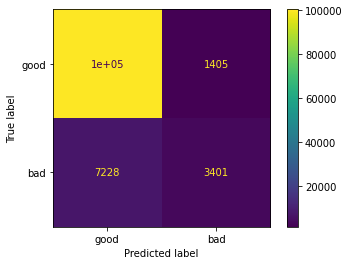

In [139]:
knn.fit(X_train,y_train)
eval_classification(knn,X_train,y_train,X_test,y_test)     

In [140]:
print('Train score: ' + str(knn.score(X_train, y_train))) #accuracy
print('Test score: ' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.936759781643918
Test score: 0.9232642685083954


### XGBClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (Test Set): 0.94
Precision (Test Set): 0.89
Recall (Test Set): 0.40
F1-Score (Test Set): 0.55
AUC: 0.87


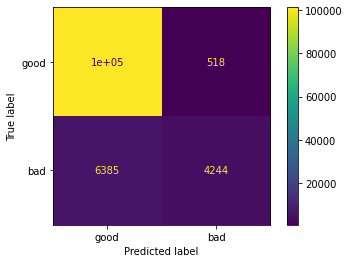

In [141]:
xgb.fit(X_train,y_train)
eval_classification(xgb,X_train,y_train,X_test,y_test)  

In [142]:
print('Train score: ' + str(xgb.score(X_train, y_train))) #accuracy
print('Test score: ' + str(xgb.score(X_test, y_test))) #accuracy

Train score: 0.9386035420007848
Test score: 0.9386416362230341


### RandomForestClassifier

<ipython-input-143-46491ac1a40f>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy (Test Set): 0.94
Precision (Test Set): 0.90
Recall (Test Set): 0.44
F1-Score (Test Set): 0.59
AUC: 0.89


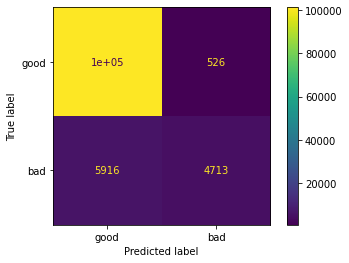

In [143]:
rf.fit(X_train,y_train)
eval_classification(rf,X_train,y_train,X_test,y_test) 

In [144]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score: ' + str(rf.score(X_test, y_test))) #accuracy

Train score: 0.9999580963555258
Test score: 0.9427393047296516


### GradientBoostingClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (Test Set): 0.94
Precision (Test Set): 0.89
Recall (Test Set): 0.40
F1-Score (Test Set): 0.55
AUC: 0.87


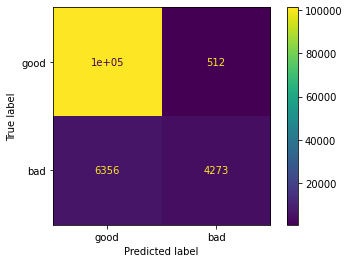

In [145]:
grad.fit(X_train,y_train)
eval_classification(grad,X_train,y_train,X_test,y_test) 

In [146]:
print('Train score: ' + str(grad.score(X_train, y_train))) #accuracy
print('Test score: ' + str(grad.score(X_test, y_test))) #accuracy

Train score: 0.9390340067122019
Test score: 0.9389527390380701


### LGBMClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (Test Set): 0.94
Precision (Test Set): 0.89
Recall (Test Set): 0.48
F1-Score (Test Set): 0.62
AUC: 0.92


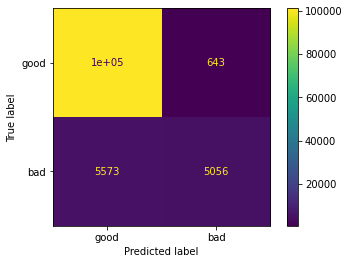

In [147]:
LGBM.fit(X_train,y_train)
eval_classification(LGBM,X_train,y_train,X_test,y_test) 

In [148]:
print('Train score: ' + str(LGBM.score(X_train, y_train))) #accuracy
print('Test score: ' + str(LGBM.score(X_test, y_test))) #accuracy

Train score: 0.9457957311614548
Test score: 0.9447481400495987


Source : https://github.com/okyhariawan/VIX-IDX-Credit-Risk-Loan-Prediction

# Handling Class Imbalance ( Under sampling )

In [149]:
from imblearn.under_sampling import RandomUnderSampler
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling

In [150]:
y_train_rus.value_counts()

risk1
0        24801
1        24801
dtype: int64

### KNeighborsClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy (Test Set): 0.73
Precision (Test Set): 0.22
Recall (Test Set): 0.73
F1-Score (Test Set): 0.34
AUC: 0.81


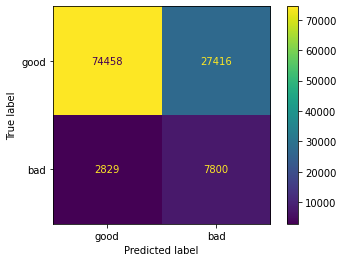

In [151]:
knn.fit(X_train_rus,y_train_rus)
eval_classification(knn,X_train_rus,y_train_rus,X_test,y_test)    

In [152]:
print('Train score: ' + str(knn.score(X_train_rus, y_train_rus))) #accuracy
print('Test score: ' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.8212370468932705
Test score: 0.7311627245495675


### XGBClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (Test Set): 0.81
Precision (Test Set): 0.30
Recall (Test Set): 0.74
F1-Score (Test Set): 0.42
AUC: 0.88


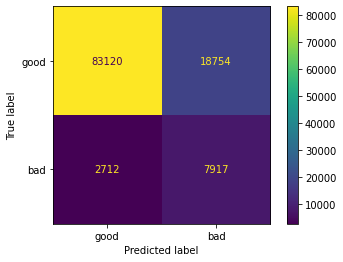

In [153]:
xgb.fit(X_train_rus,y_train_rus)
eval_classification(xgb,X_train_rus,y_train_rus,X_test,y_test)  

In [154]:
print('Train score: ' + str(xgb.score(X_train_rus, y_train_rus))) #accuracy
print('Test score: ' + str(xgb.score(X_test, y_test))) #accuracy

Train score: 0.7813797830732632
Test score: 0.8091961992124654


### RandomForestClassifier

<ipython-input-155-8ac377c4375b>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy (Test Set): 0.84
Precision (Test Set): 0.35
Recall (Test Set): 0.75
F1-Score (Test Set): 0.47
AUC: 0.89


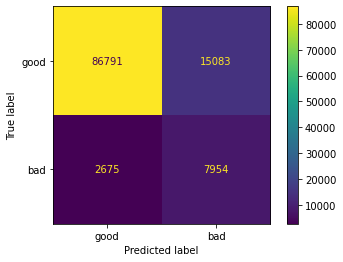

In [155]:
rf.fit(X_train_rus,y_train_rus)
eval_classification(rf,X_train_rus,y_train_rus,X_test,y_test) 

In [156]:
print('Train score: ' + str(rf.score(X_train_rus, y_train_rus))) #accuracy
print('Test score: ' + str(rf.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.8421553203025697


### GradientBoostingClassifier




/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (Test Set): 0.80
Precision (Test Set): 0.29
Recall (Test Set): 0.75
F1-Score (Test Set): 0.42
AUC: 0.88


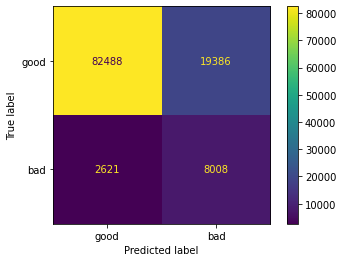

In [157]:
grad.fit(X_train_rus,y_train_rus)
eval_classification(grad,X_train_rus,y_train_rus,X_test,y_test) 

In [158]:
print('Train score: ' + str(grad.score(X_train_rus, y_train_rus))) #accuracy
print('Test score: ' + str(grad.score(X_test, y_test))) #accuracy

Train score: 0.784040966090077
Test score: 0.8043874385571941


### LGBMClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (Test Set): 0.86
Precision (Test Set): 0.39
Recall (Test Set): 0.78
F1-Score (Test Set): 0.52
AUC: 0.92


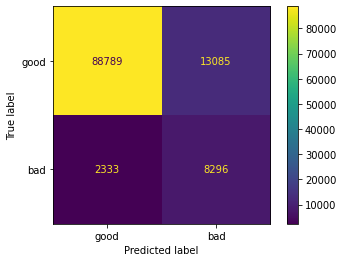

In [159]:
LGBM.fit(X_train_rus,y_train_rus)
eval_classification(LGBM,X_train_rus,y_train_rus,X_test,y_test)

In [160]:
print('Train score: ' + str(LGBM.score(X_train_rus, y_train_rus))) #accuracy
print('Test score: ' + str(LGBM.score(X_test, y_test))) #accuracy

Train score: 0.8397242046691665
Test score: 0.8629547656506937


# Feature Importance

In [162]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

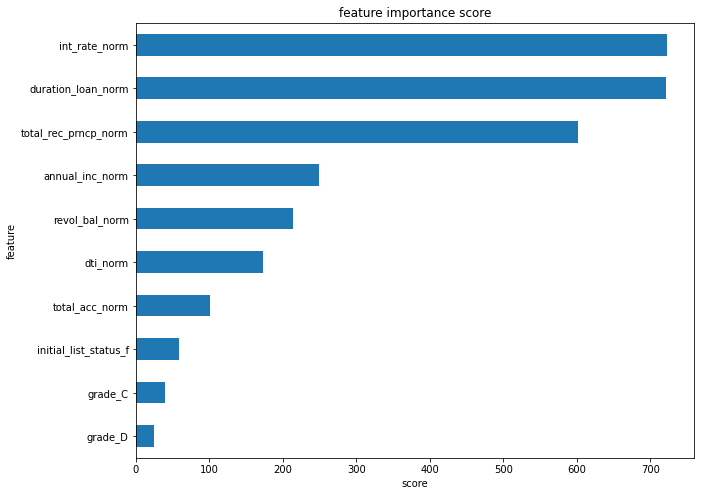

In [163]:
show_feature_importance(LGBM)

- int_rate : bunga pinjaman
- annual_inc : pendapatan tahunan
- dti : debt to income ratio
- revol_bal : total saldo revolving credit
- total_acc : total credit saat ini
- total_rec_prncp : total uang yang diterima
- duration_loan : durasi peminjaman (bulan)
- risk1 : good / bad risk
- grade : grade
- home_ownership : kepemilikan rumah
- initial_list_status : Status daftar awal pinjaman. Nilai yang mungkin adalah - utuh, fraksional